# Ejercicio 3
Contenido del dataset: Conjunto de datos de teledetección de alta resolución (Quickbird). Un pequeño número de muestras de formación de árboles enfermos, un gran número de otras coberturas terrestres. Conjunto de datos de prueba de una muestra aleatoria estratificada de imagen.
El ejercicio consiste obtener un clasificador para clasificar las imágenes de árbol enfermos (clase positiva) de imágenes de otro tipo de cubierta (clase negativa). Hay 6 atributos, el primero es la clase: 'w' (diseased trees), 'n' (all other land cover), el segundo es GLCM_Pan: GLCM mean texture (Pan band), el tercero es Mean_G: Mean green value, el cuarto es Mean_R: Mean red value, el quinto es Mean_NIR: Mean NIR value
, y el sexto es SD_Pan: Standard deviation (Pan band). El dataset está en formato csv y se da por separado el conjunto test (testing.csv) y de entrenamiento (training.csv)
*   URL: https://archive.ics.uci.edu/ml/datasets/Wilt
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip

*Tomando como base el ejemplo 8 de los suministrados en clase, implementar un clasificador basado en Random Forest que contenga los siguientes apartados.
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify si las clases estuviesen desbalanceadas.
*   Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Obtener curva ROC y su área.
*   Obtener curva presición recall.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.

In [1]:
import pandas as pd

In [2]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
unzip wilt.zip

Archive:  wilt.zip
  inflating: testing.csv             
  inflating: training.csv            


--2024-01-07 19:22:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wilt.zip’

     0K .......... .......... .......... .......... ..........  409K
    50K .......... .......... .......... .......... .......... 1.24M
   100K .......... .....                                        691K=0.2s

2024-01-07 19:22:27 (628 KB/s) - ‘wilt.zip’ saved [118593]



In [3]:
wilt_train = pd.read_csv("/content/training.csv")
wilt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4339 non-null   object 
 1   GLCM_pan    4339 non-null   float64
 2   Mean_Green  4339 non-null   float64
 3   Mean_Red    4339 non-null   float64
 4   Mean_NIR    4339 non-null   float64
 5   SD_pan      4339 non-null   float64
dtypes: float64(5), object(1)
memory usage: 203.5+ KB


In [4]:
wilt_test = pd.read_csv("/content/testing.csv")
wilt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       500 non-null    object 
 1   GLCM_pan    500 non-null    float64
 2   Mean_Green  500 non-null    float64
 3   Mean_Red    500 non-null    float64
 4   Mean_NIR    500 non-null    float64
 5   SD_pan      500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [ ]:
#Antes de definir el clasificador habría que extraer las etiquetas, que están en la primera columna, de los conjuntos de entrenamiento
#y de test, y después habría que borrar esa primera columna de los conjuntos de entrenamiento y test

RF WITH entropy + 500 of estimators+ 64 of  max_leaf_nodes

In [5]:
X_train = wilt_train.drop("class",axis=1)
X_test =wilt_test.drop("class", axis=1)
y_train = wilt_train["class"]
y_test = wilt_test["class"]

In [6]:
from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.pipeline import make_pipeline #Para usar el pipe
from sklearn.ensemble import RandomForestClassifier
RF_clasificador = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=500,max_leaf_nodes=64,criterion="entropy",random_state = 42))

In [7]:
#Aplicamos el clasificador al conjunto de entrenamiento mediante la función fit
RF_clasificador.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_leaf_nodes=64,
                                        n_estimators=500, random_state=42))])

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Calculamos la predicción para el conjunto de test
y_pred = RF_clasificador.predict(X_test)
#Se calcula la matriz de confusión.
cm = confusion_matrix(y_test, y_pred)

In [9]:
cm

array([[312,   1],
       [104,  83]])

In [10]:
# Cambiar las etiquetas de clase a binario 0 o 1.
y_test.replace("w",1,inplace=True)
y_test.replace("n",0,inplace=True)

In [11]:
y_test

0      0
1      0
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: class, Length: 500, dtype: int64

In [12]:
# Cambiar las etiquetas de clase a binario 0 o 1.
y_pred[y_pred == "w"] = 1
y_pred[y_pred == "n"]=0

In [13]:
y_pred = pd.Series(y_pred)

In [14]:
# Convert y_pred to integer values if it contains numeric data
y_pred = y_pred.astype(int)

In [15]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, precision_recall_curve
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.79, 0.9880952380952381, 0.44385026737967914, 0.6125461254612546)

In [16]:
#Ahora vamos a ver la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score #para obtener la curva roc y su área
from sklearn.metrics import RocCurveDisplay

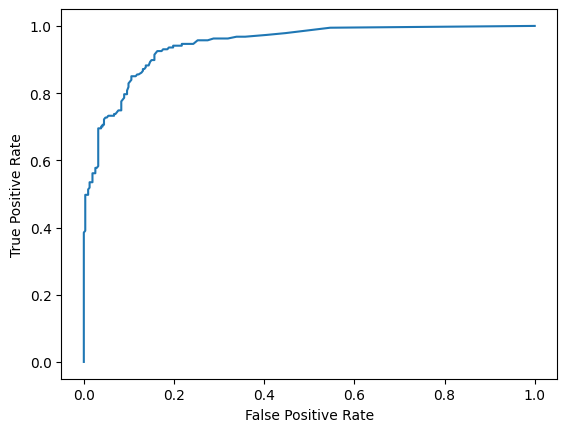

In [17]:
y_score = RF_clasificador.predict_proba(X_test)[:,1]
y_test_int = y_test.astype(int)
pos_label_value = 1
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=pos_label_value)
#Solo recoge los dos primeros valores devueltos.
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [18]:
roc_auc_score(y_test, y_score) #area bajo la curva roc

0.9450889272351404

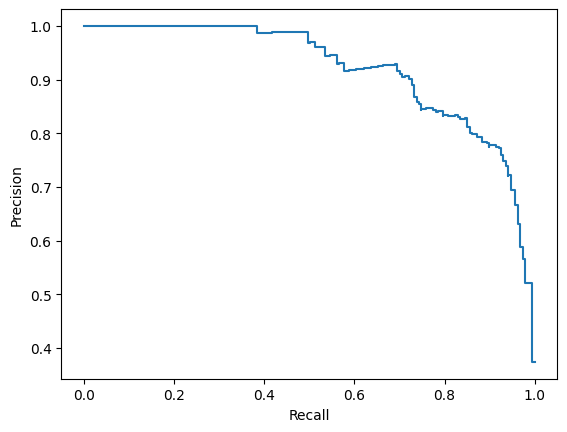

In [19]:
#Ahora vamos a crear la curva precision recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
pos_label_value = 1
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=pos_label_value)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

# **Summary**
Primero obtuvimos los diferentes subconjuntos para entrenamiento y prueba, luego creamos un pipeline para escalar los datos usando StandardScaler y el Clasificador de Bosque Aleatorio con los parámetros especificados. Después, ajustamos los datos al modelo y obtenemos la predicción para x_test. Calculamos la matriz de confusión y otras métricas asociadas, así como las curvas ROC y PR. El modelo aquí clasifica bien la clase con más muestras, sin embargo, la clase minoritaria se clasifica incorrectamente, donde el valor de recuperación es del 44.3%, lo cual también se refleja en la curva PR. La precisión es muy alta y la recuperación es baja, debido al desequilibrio relativo en los datos de entrenamiento, y en todo el conjunto de datos.